In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-usage-datasetapplications/social_media_usage.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/social-media-usage-datasetapplications/social_media_usage.csv")

In [4]:
df.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [5]:
print(f"Data rows :{df.shape[0]}\nData columns : {df.shape[1]}")

Data rows :1000
Data columns : 6


# Data Cleaning

In [6]:
# Check for duplicate User_IDs
duplicate_users = df['User_ID'].duplicated().sum()
print(f"Number of duplicate User_IDs: {duplicate_users}")

# Since User_ID should be unique, let's confirm this
if duplicate_users == 0:
    print("All User_IDs are unique.")

# Convert 'App' column to category type
df['App'] = df['App'].astype('category')

# Summary of categorical variables
print("\nSummary of Categorical Variables:")
print(df.select_dtypes(include=['category']).describe())

# Encode 'App' for modeling purposes
df['App_Code'] = df['App'].cat.codes

Number of duplicate User_IDs: 0
All User_IDs are unique.

Summary of Categorical Variables:
             App
count       1000
unique         7
top     Snapchat
freq         156


# Exploratory Data Analysis(EDA)

* Distribution of Daily Minutes Spent

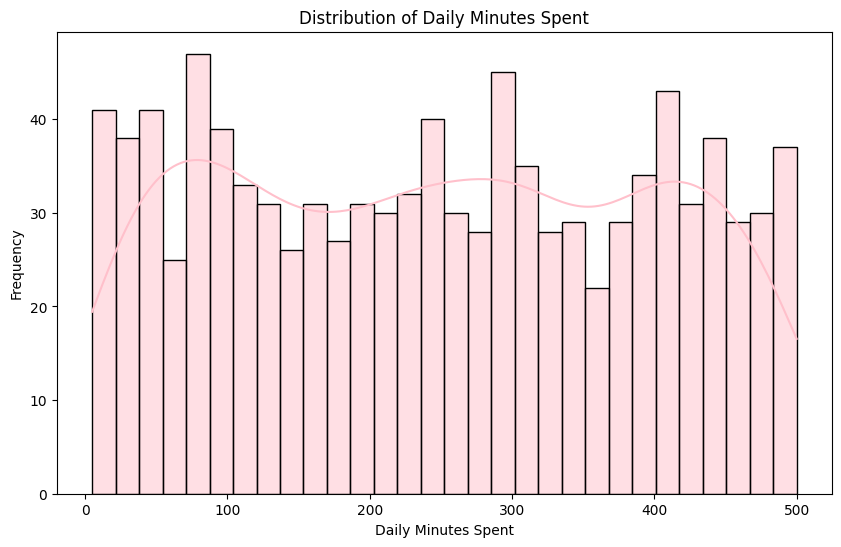

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['Daily_Minutes_Spent'], bins=30, kde=True, color='pink')
plt.title('Distribution of Daily Minutes Spent')
plt.xlabel('Daily Minutes Spent')
plt.ylabel('Frequency')
plt.show()

* Distribution of Posts Per Day

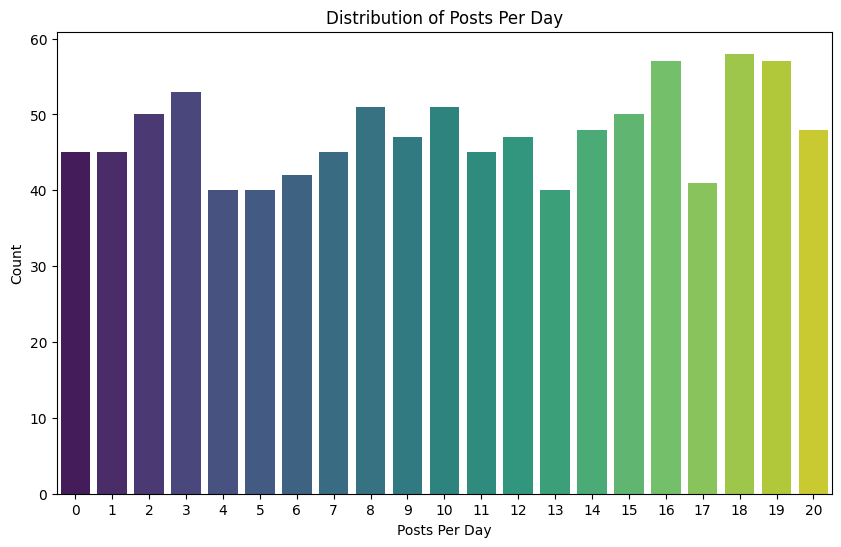

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Posts_Per_Day', data=df, palette='viridis')
plt.title('Distribution of Posts Per Day')
plt.xlabel('Posts Per Day')
plt.ylabel('Count')
plt.show()

* Posts Per Day by App

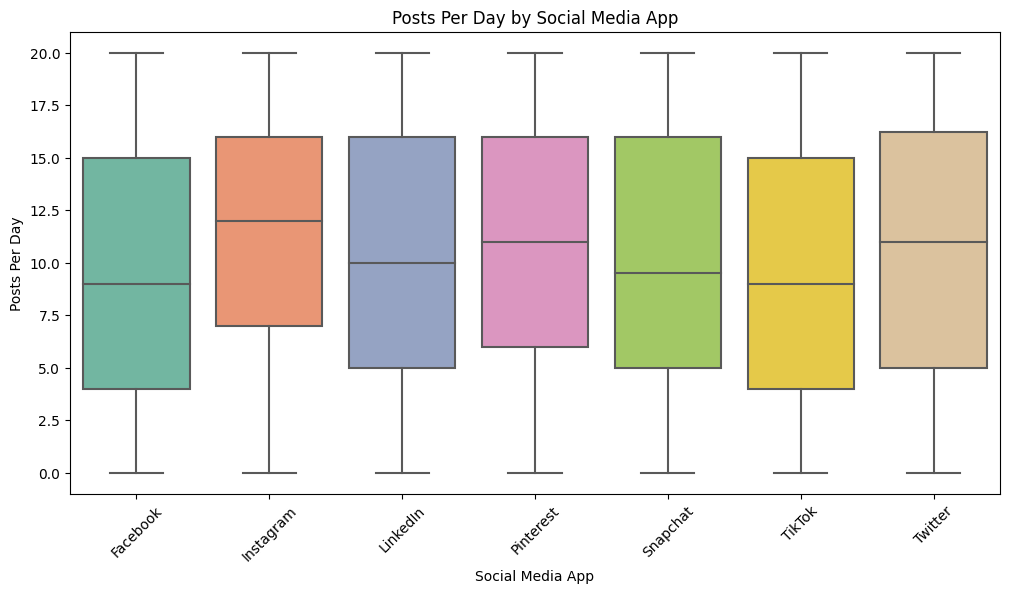

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='App', y='Posts_Per_Day', data=df, palette='Set2')
plt.title('Posts Per Day by Social Media App')
plt.xlabel('Social Media App')
plt.ylabel('Posts Per Day')
plt.xticks(rotation=45)
plt.show()

* Correlation Matrix

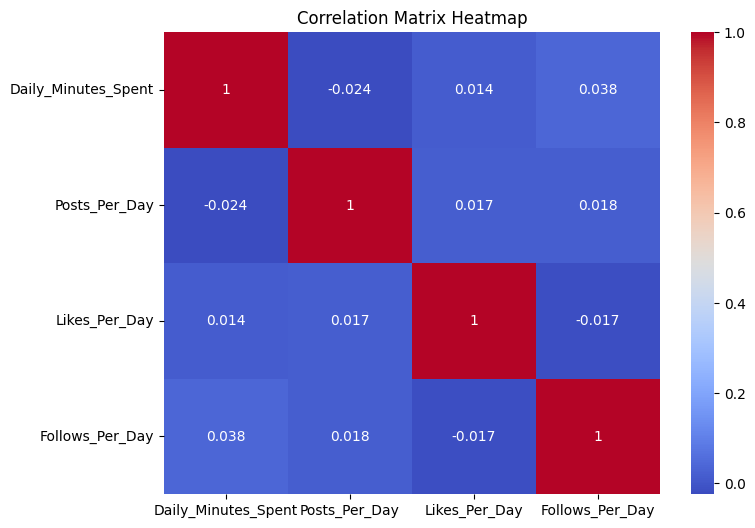

In [10]:
# Compute correlation matrix
corr_matrix = df[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

* Distribution Of Likes,Posts and Follows Per Day 

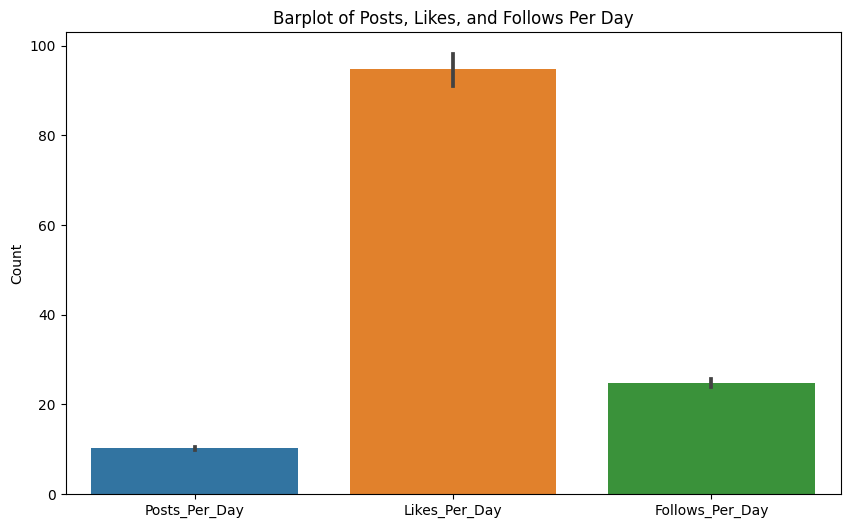

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df[["Posts_Per_Day",'Likes_Per_Day','Follows_Per_Day']])
plt.title("Barplot of Posts, Likes, and Follows Per Day")
plt.ylabel('Count')
plt.show()

* Distribution Of App used 

<Axes: title={'center': 'App Used'}, xlabel='App'>

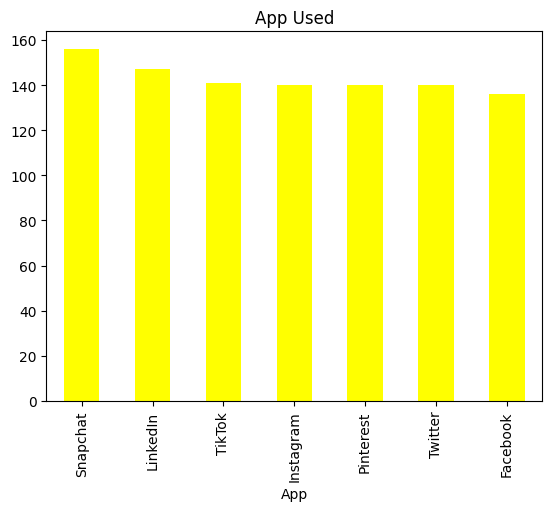

In [12]:
df["App"].value_counts().plot(kind = "bar",color = "Yellow",title = "App Used")